# Pytorch

Pytorch framework to create a "k" layer ANN.


In [22]:
import pandas as pd
#import quandl
import datetime
import os
from sklearn.model_selection import train_test_split

In [23]:
os.getcwd()

'/home/liana/Gold-price-NN'

In [129]:
########LOADING THE DATA########

data = pd.read_csv('Gold_Pall_Silver.csv')
#print (data)
y = data.GOLD
#print(y)
X = data.drop('GOLD', axis=1)
#X = data
#print(data)
#print(type(data))

In [130]:
#######SPLITTING THE DATA IN 80% FOR TRAINNING SET AND 20% FOR TESTING SET##########

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

#print(X_test.shape)

                   Date   PALL  SILVER
5263   7/2/2013 0:00:00  695.0   19.62
5783  12/9/2015 0:00:00  556.0   14.27
762   7/11/1995 0:00:00  159.0    5.12
3420  1/25/2006 0:00:00  279.0    9.42
5923  7/13/2016 0:00:00  642.0   20.29
5263    1252.50
5783    1081.00
762      384.75
3420     561.75
5923    1342.75
Name: GOLD, dtype: float64
                   Date   PALL  SILVER
3495  5/15/2006 0:00:00  370.0   13.25
6167  7/20/2017 0:00:00  853.0   16.18
3242  5/13/2005 0:00:00  190.0    6.88
5759  11/4/2015 0:00:00  649.0   15.26
3701   3/6/2007 0:00:00  345.0   12.93
3495     687.50
6167    1238.70
3242     420.00
5759    1114.70
3701     643.75
Name: GOLD, dtype: float64


Populating the interactive namespace from numpy and matplotlib


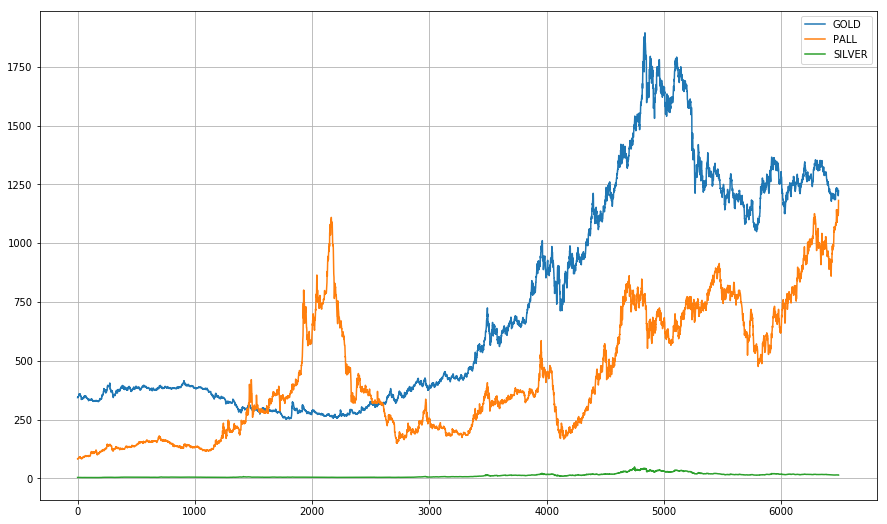

In [131]:
######PLOATING THE DATA#########

import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
data.plot(y=["GOLD", "PALL", "SILVER"], grid=True)

In [132]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from IPython.core.debugger import set_trace

In [133]:
train_set = list(zip(X_train, y_train))

print(len(train_set))
print(train_set)

test_set = list(zip (X_test, y_test))

batch_size = 64

train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                         batch_size=batch_size,
                                         shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                         batch_size=batch_size,
                                         shuffle=False)



5191
[(array(['7/2/2013 0:00:00', 695.0, 19.62], dtype=object), 1252.5), (array(['12/9/2015 0:00:00', 556.0, 14.27], dtype=object), 1081.0), (array(['7/11/1995 0:00:00', 159.0, 5.12], dtype=object), 384.75), (array(['1/25/2006 0:00:00', 279.0, 9.42], dtype=object), 561.75), (array(['7/13/2016 0:00:00', 642.0, 20.29], dtype=object), 1342.75), (array(['9/25/2018 0:00:00', 1070.0, 14.29], dtype=object), 1201.9), (array(['11/22/2007 0:00:00', 358.0, 14.52], dtype=object), 803.25), (array(['3/30/1994 0:00:00', 135.0, 5.61], dtype=object), 387.15), (array(['2/3/2012 0:00:00', 712.0, 33.93], dtype=object), 1734.0), (array(['5/10/2018 0:00:00', 997.0, 16.6], dtype=object), 1318.8), (array(['11/23/2017 0:00:00', 1010.0, 17.09], dtype=object), 1290.35), (array(['1/12/2006 0:00:00', 273.0, 9.0], dtype=object), 542.5), (array(['4/16/2003 0:00:00', 150.0, 4.49], dtype=object), 324.1), (array(['6/2/2005 0:00:00', 188.0, 7.48], dtype=object), 420.4), (array(['6/25/2012 0:00:00', 607.0, 26.72], dtype=

In [134]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self, x):
        
        x = np.asarray(x)
        print(x)
        x = x.view(-1, 3)
        x1 = F.relu(self.fc1(x))
        x2 = F.relu(self.fc2(x1))
        x3 = self.fc3(x2)
#         set_trace()
        return F.log_softmax(x3,1)
    
    def name(self):
        return "MLP"

In [135]:
model = MLP()

optimizer = optim.SGD(model.parameters(), lr=0.01)

criterion = nn.CrossEntropyLoss()

for epoch in range(20):
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt+= (pred_label == target).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt*1.0/total_cnt))
    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(test_loader):
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
#         print(target.data)
        correct_cnt += (pred_label == target).sum().item()
        # smooth average
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt * 1.0 / total_cnt))

TypeError: batch must contain tensors, numbers, dicts or lists; found object